In [ ]:
import igraph as ig
from igraph import Graph

def cayley_tree(degree, depth):
    if depth == 0:
        return Graph(1)
    if depth == 1:
        return Graph.Tree(degree+1, degree)
    d = degree - 1
    n1, n2 = d ** (depth+1) - 1, d ** depth - 1
    n1 //= d - 1
    n2 //= d - 1
    return Graph.Tree(n1, d) + Graph.Tree(n2, d) + (0, n1)

In [2]:
import numpy as np
import scipy

def calc_evals(graph):
    if len(graph.get_diameter()) > 10:
        adj = graph.get_adjacency_sparse().asfptype()
        evals, evecs = scipy.sparse.linalg.eigsh(adj, k=adj.shape[0]-1)
    else:
        adj = graph.get_adjacency()
        evals, evecs = scipy.linalg.eigh(adj)
    return evals

In [3]:
def calc_gap_and_nullity(evals, bin_width = 0.05):
    counts, bins = np.histogram(evals, bins=np.arange(min(evals), max(evals) + bin_width, bin_width))

    nullity = max(counts) / sum(counts)

    gap = 0
    chunk = counts[np.argmax(counts)+1:]
    while chunk[gap] == 0 and gap < len(chunk): 
        gap += 1
        
    return (gap * bin_width, nullity)

In [4]:
degree = 3

gaps_3 = []
for depth in range (1, 7):
    gr = cayley_tree(degree, depth)
    evals = calc_evals(gr)
    gap, nullity = calc_gap_and_nullity(evals)
    gaps_3.append(gap)

Text(0.5, 1.0, 'Spectral gap vs graph depth for degree = 3')

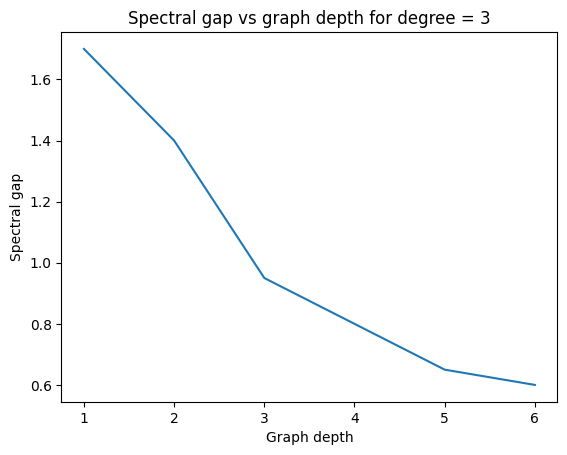

In [5]:
import matplotlib.pyplot as plt

plt.plot(range(1, 7), gaps_3)
plt.ylabel("Spectral gap")
plt.xlabel("Graph depth")
plt.title("Spectral gap vs graph depth for degree = 3")

In [6]:
degree = 4

gaps_4 = []
for depth in range (1, 7):
    gr = cayley_tree(degree, depth)
    evals = calc_evals(gr)
    gap, nullity = calc_gap_and_nullity(evals)
    gaps_4.append(gap)

Text(0.5, 1.0, 'Spectral gap vs graph depth for degrees = {3,4}')

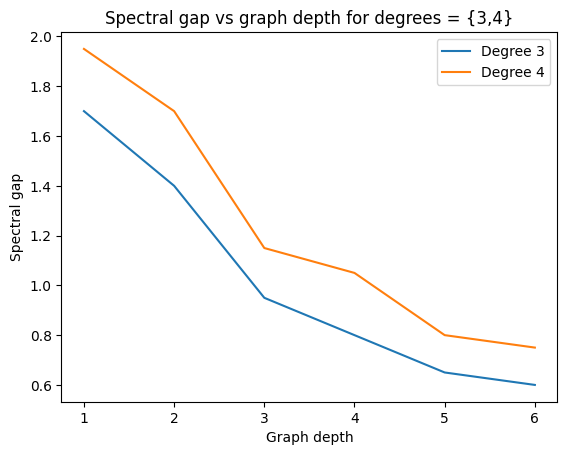

In [7]:
plt.plot(range(1,7), gaps_3, label="Degree 3")
plt.plot(range(1,7), gaps_4, label="Degree 4")
plt.legend(loc="best")
plt.ylabel("Spectral gap")
plt.xlabel("Graph depth")
plt.title("Spectral gap vs graph depth for degrees = {3,4}")

Text(0, 0.5, 'CDF')

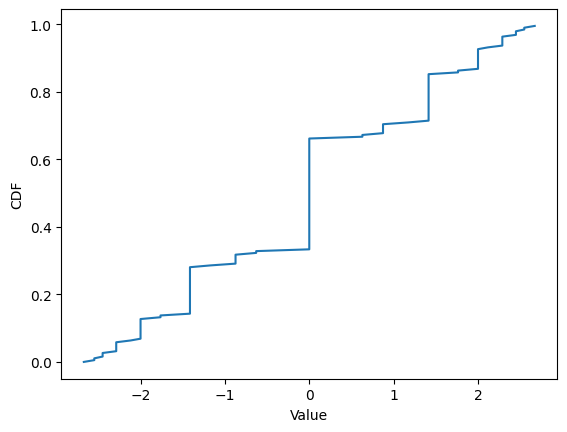

In [9]:
gr = cayley_tree(3, 6)
#ig.plot(gr, bbox=(0, 0, 500, 500))
evals = calc_evals(gr)

plt.plot(np.sort(evals), np.linspace(0, 1, len(evals), endpoint=False))
plt.xlabel("Value")
plt.ylabel("CDF")

Text(0, 0.5, 'PDF')

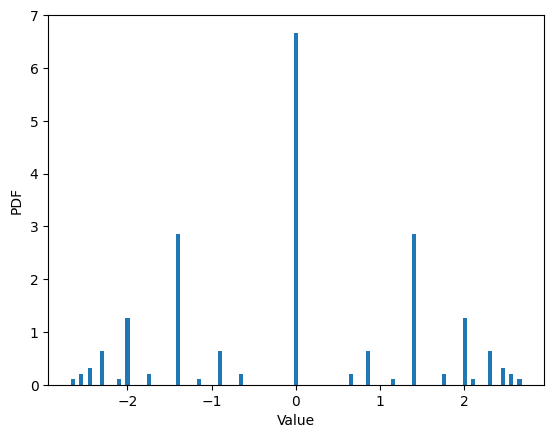

In [10]:
bin_width = 0.05

plt.hist(evals, density=True, bins=np.arange(min(evals), max(evals) + bin_width, bin_width))
plt.xlabel("Value")
plt.ylabel("PDF")